In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
from scipy import stats
from patsy import bs, dmatrix

In [2]:
df = pd.read_csv('wage.csv')
df.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   sex         3000 non-null   object 
 4   maritl      3000 non-null   object 
 5   race        3000 non-null   object 
 6   education   3000 non-null   object 
 7   region      3000 non-null   object 
 8   jobclass    3000 non-null   object 
 9   health      3000 non-null   object 
 10  health_ins  3000 non-null   object 
 11  logwage     3000 non-null   float64
 12  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


In [4]:
# Find Null values in dataset
df.isnull().sum()

Unnamed: 0    0
year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [5]:
# Object columns:
object_col = df.dtypes == object
object_col[object_col == True].index

Index(['sex', 'maritl', 'race', 'education', 'region', 'jobclass', 'health',
       'health_ins'],
      dtype='object')

In [6]:
df[object_col[object_col == True].index].head()

,sex,maritl,race,education,region,jobclass,health,health_ins
0,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No
1,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No
2,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes
3,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes
4,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes


In [7]:
df[object_col[object_col == True].index].describe()
# 3 of object type columns have 2 uniques variable
# sex column only has 1 variable
# maritl and education have 5 variables
# race has 4 variables
# We have to convert them into numeric variable if we want to use them later on

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


### Polynomial Regression and Step Functions

In [11]:
# Define a 5th order polynomial function
poly_order = 4 
poly = 'wage ~ 1 +' + '+'.join(['I(age**{})'.format(i) for i in np.arange(1, poly_order + 1)])

print(poly)

# Define the model
model_poly = smf.ols(poly, data=df[['age', 'wage']])

# Fit the model
result_poly = model_poly.fit()

# Summary of fitted model
result_poly.summary()

wage ~ 1 +I(age**1)+I(age**2)+I(age**3)+I(age**4)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           2.77e-57
Time:                        06:22:44   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -184.1542     60.040     -3.067      0.002    -301.879     -66.430
I(age ** 1)    21.2455      5.887      3.609      0.000       9.703      32.788
I(age ** 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
I(age ** 3)     0.0068      0.003      2.221      0.026       0.001       0.013
I(age ** 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
table, data, col_names = summary_table(result_poly, alpha=0.05)

# Print column name of summary table
print(col_names)

# Array of fitted values
fitted_val = result_poly.fittedvalues.values

# Predicted, We can use this:
predicted_1 = data[:, 2].T

# Or use predict method:
#age_range = np.linspace(df['age'].min(), df['age'].max(), 1000)
#predicted_2 = model_poly.predict(age_range)

# predict low confidence interval
low_ci = data[:, 4].T

# predict high confidence interval
high_ci = data[:, 5].T

# Dataframe of Fitted values, residuals and studentized residuals
df_r = pd.DataFrame({'Predicted': predicted_1, 'low_ci': low_ci, 'high_ci': high_ci} )

['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


In [14]:
df_r['age'] = df['age']
df_r.sort_values(by = 'age', axis = 0, inplace = True)

<IPython.core.display.Javascript object>


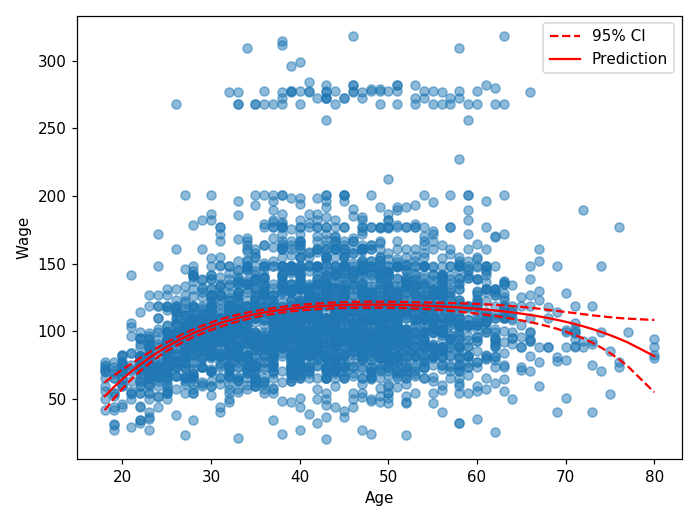

In [15]:
%matplotlib notebook
plt.scatter(df['age'], df['wage'], alpha = 0.5)
plt.plot(df_r['age'], df_r['high_ci'], color = 'r', linestyle = '--', label = '95% CI')
plt.plot(df_r['age'], df_r['Predicted'], color = 'r', label = 'Prediction')
plt.plot(df_r['age'], df_r['low_ci'], color = 'r', linestyle = '--')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Wage')
plt.tight_layout()
plt.savefig('4th_order_poly_regression_wage_vs_age.png', dpi = 100)

### ANOVA

In [18]:
"""In performing a polynomial regression we must decide on the degree of
the polynomial to use. One way to do this is by using hypothesis tests. We
now fit models ranging from linear to a degree-5 polynomial and seek to
determine the simplest model which is sufficient to explain the relationship"""
poly_result = []
for poly_order in [1,2,3,4,5]:
    poly_formula = 'wage ~ 1 +' + '+'.join(['I(age**{})'.format(i) for i in np.arange(1, poly_order + 1)])
    # Define the model and fit it
    poly_result.append(smf.ols(poly_formula, data=df[['age', 'wage']]).fit())

In [20]:
# Using ANOVA to compare models
sm.stats.anova_lm(*poly_result)

C:\Users\u0125384\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\u0125384\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\u0125384\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [21]:
# 4th order polynomial shows P-value of 0.05 which is acceptable but
# 5th order P-value is 0.37. So we can go with a 4th order. 

### Logistic Regression Model

In [50]:
"""Next we consider the task of predicting whether an individual earns more
than $250,000 per year."""

# Convert wage column into a binary column, wage > 250k is 1, else 0.
df['High_wage'] = df.wage.apply(lambda x: 1.0 if x > 250 else 0.0)

# Create 4th order polynomial formula
poly_order = 4
formula = 'High_wage ~ 1 +' + '+'.join(['I(age**{})'.format(i) for i in np.arange(1, poly_order + 1)])

# Create Logistic regression model
LR_model = smf.logit(formula, data=df)

# Fit the model
LR_result = LR_model.fit()

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


In [56]:
# Predict 
age_list = np.linspace(df['age'].min(), df['age'].max(), 1000)
LR_predictions = LR_result.predict(exog = dict(age = age_list))

In [64]:
LR_result.cov_params()

,Intercept,I(age ** 1),I(age ** 2),I(age ** 3),I(age ** 4)
Intercept,2271.025387,-199.041913,6.389460,-8.913645e-02,4.566150e-04
I(age ** 1),-199.041913,17.530146,-0.565338,7.920970e-03,-4.074065e-05
I(age ** 2),6.389460,-0.565338,0.018313,-2.576816e-04,1.330717e-06
I(age ** 3),-0.089136,0.007921,-0.000258,3.640801e-06,-1.887688e-08
I(age ** 4),0.000457,-0.000041,0.000001,-1.887688e-08,9.825539e-11


In [77]:
# Construct Standard Error (SE) of the Model
# SE is squared-root of Var f(x0) = β0 + β1 x0 + β2 x0^2 + β3 x0^3 + β4 x0^4
# x0 is age
# Var f(x0) is L^T C L where L is (1, x0, x0^2, x0^3, x0^4) and C in Covariance matrix
SE = []
for age in age_list:
    L = np.array([[1, age, age**2, age**3, age**4]])
    right = np.dot(LR_result.cov_params(), L.T)
    var = np.dot(L, right)
    SE = np.append(SE, np.sqrt(var))

In [88]:
# To find 95 % confidence interval

# 1st: Critical Values of the Student's t Distribution times SE
width = stats.t.isf(.05/2,len(df)) * SE

# 2nd: Linear fit values
Linear_fit = LR_result.predict(exog=dict(age=age_list), linear=True)

# 3rd: Adding width to each linear fit value
upper = Linear_fit + width
lower = Linear_fit - width

# 4th: Plug into Link function
upper_val = np.exp(upper)/(1+np.exp(upper))
lower_val = np.exp(lower)/(1+np.exp(lower))

<IPython.core.display.Javascript object>


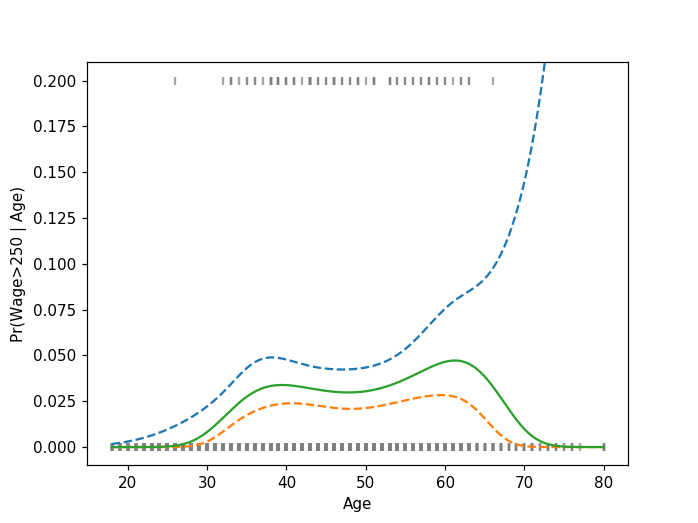

In [93]:
%matplotlib notebook
plt.scatter(df.age, df.High_wage/5, s=30, c='grey', marker='|', alpha=0.7)
plt.plot(age_list, upper_val, label = '95% CI',linestyle = '--')
plt.plot(age_list, lower_val,linestyle = '--')
plt.plot(age_list, LR_predictions, label = 'Prediction')
plt.ylim(-0.01, 0.21)
plt.xlabel('Age')
plt.ylabel('Pr(Wage>250 | Age)')
plt.savefig('Logistic_Regression.png', dpi = 500)

### Splines

In [119]:
# 1st: generating cubic spline with 3 age knots at 25, 40 and 60.
dataset_k3 = dmatrix("bs(age, knots=(25,40, 60), degree=3, include_intercept=False)", 
                        data={"age":df.age},return_type='dataframe')

print('Degrees of freedom: {}'.format(dataset_k3.shape[1])) # Cubic spline with k knots has 3 + 4 degrees of freedom 
dataset_k3.head()

Degrees of freedom: 7


,Intercept,"bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1.0,0.559911,0.403778,0.033395,0.000000,0.000000,0.0
2,1.0,0.000000,0.114796,0.618564,0.262733,0.003906,0.0
3,1.0,0.000000,0.167109,0.633167,0.198880,0.000844,0.0
4,1.0,0.000000,0.034014,0.508194,0.426542,0.031250,0.0


In [133]:
# 2nd: Fitting GLM (Generalised linear model) on generated 3-knots dataset
results_k3 = sm.GLM(df.wage, dataset_k3).fit()

#3rd: Predict wage values, we will predict on new values of age

# 3rd-a
age_list = np.linspace(df['age'].min(), df['age'].max(), 1000)


#3rd-b
dataset_k3_new = dmatrix("bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)",
                             data = {"age_list": age_list}, return_type='dataframe')

# 3rd-c
predict_k3 = results_k3.predict(dataset_k3_new)

In [134]:
# Lets have a look at rows of dataset_k3_new. We will use them in confidence interval calculation:
dataset_k3_new.values[:2] # Each row has 7 parameters correspond to 7 degrees of freedom

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.62881644e-02, 7.47038458e-05, 3.69580112e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [135]:
def CI(dataset, results): # Find confidence interval
    
    # Makeing prediction on dataset 
    prediction = results.predict(dataset)
    
    # Construct Standard Error (SE) of the Model
    # SE is squared-root of Var f(x0) = terms of Splines that are in row of dataset_k3_new
    # Var f(x0) is L^T C L where L is row of dataset_k3_new and C in Covariance matrix
    
    SE = np.array([])
    for L in dataset.values:
        
        right = np.dot(results.cov_params(), L.T)
        var = np.dot(L, right)
        SE = np.append(SE, np.sqrt(var))
    # To find 95 % confidence interval

    # 1st: Critical Values of the Student's t Distribution times SE
    width = stats.t.isf(.05/2,len(df)) * SE

    # 2nd: Adding width to each predicted value
    upper = prediction + width
    lower = prediction - width
    
    return upper, lower

In [137]:
upper_ci, lower_ci = CI(dataset_k3_new, results_k3)

<IPython.core.display.Javascript object>


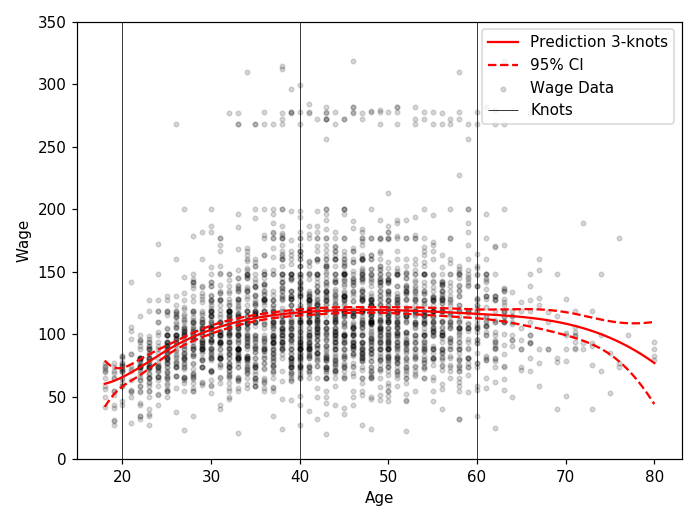

In [159]:
%matplotlib notebook
y_min, y_max = 0, 350
plt.scatter(df.age, df.wage, alpha = 0.15, label = 'Wage Data', color = 'k', marker = '.')
plt.plot(age_list, predict_k3, label = 'Prediction 3-knots', color = 'r')
plt.plot(age_list, upper_ci, linestyle = '--', label = '95% CI', color = 'r')
plt.plot(age_list, lower_ci,  linestyle = '--', color = 'r')
plt.vlines([20, 40, 60], ymin = y_min, ymax = y_max, linestyle = '-', linewidth = 0.5, label = 'Knots')
plt.ylim(y_min, y_max)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Wage')
plt.tight_layout()
plt.savefig('Cubic_Splines_knots.png', dpi = 100)

### Natural Spline

In [ ]:
# 1st: generating cubic spline with 3 age knots at 25, 40 and 60.
dataset_k4 = dmatrix("bs(age, knots=(25,40, 60), degree=3, include_intercept=False)", 
                        data={"age":df.age},return_type='dataframe')

print('Degrees of freedom: {}'.format(dataset_k4.shape[1])) # Cubic spline with k knots has 3 + 4 degrees of freedom 
